# 알고리즘 트레이딩 실습 1

<a href="https://colab.research.google.com/github/SLCFLAB/Data-Science-Python/blob/main/Day%203/3_2.%20Data%20exploration%20with%20Iris%20dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Finance-datareader 에서 데이터 받아오기

Reference:    
https://financedata.github.io/posts/finance-data-reader-users-guide.html

In [1]:
!pip install -U finance-datareader

In [2]:
!pip install cvxopt

In [3]:
import FinanceDataReader as fdr
print(fdr.__version__)
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import cvxopt as opt
from cvxopt import solvers
import warnings

# 경고 메세지를 띄우고 싶지 않다면 아래 주석 제거
#warnings.filterwarnings('ignore')

0.9.33


## StockListing 함수

거래소에 속한 종목을 가져오는 데 사용. Input: **market**

한국 종목
* KRX - 한국 전체 거래소(코스피 + 코스닥 + 코넥스)
* KOSPI, KOSDAQ, KONEX

미국 종목
* NASDAQ, NYSE, AMEX, SP500

In [4]:
sp500_listing = fdr.StockListing('SP500')
sp500_listing

/Users/seungjulee/opt/anaconda3/envs/finance_env/lib/python3.7/site-packages/FinanceDataReader/wikipedia/listing.py:13: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Symbol'] = df['Symbol'].str.replace('\.', '')


,Symbol,Name,Sector,Industry
0,MMM,3M,Industrials,Industrial Conglomerates
1,AOS,A. O. Smith,Industrials,Building Products
2,ABT,Abbott,Health Care,Health Care Equipment
3,ABBV,AbbVie,Health Care,Pharmaceuticals
4,ABMD,Abiomed,Health Care,Health Care Equipment
...,...,...,...,...
500,YUM,Yum! Brands,Consumer Discretionary,Restaurants
501,ZBRA,Zebra,Information Technology,Electronic Equipment & Instruments
502,ZBH,Zimmer Biomet,Health Care,Health Care Equipment
503,ZION,Zions Bancorp,Financials,Regional Banks


In [5]:
kospi_listing = fdr.StockListing('KOSPI')
kospi_listing

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,"박대현, 손삼달",http://www.ajnet.co.kr,서울특별시
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시
6,152100,KOSPI,ARIRANG 200,NaN,NaN,NaT,NaN,NaN,NaN,NaN
7,295820,KOSPI,ARIRANG 200동일가중,NaN,NaN,NaT,NaN,NaN,NaN,NaN
8,253150,KOSPI,ARIRANG 200선물레버리지,NaN,NaN,NaT,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
7924,000540,KOSPI,흥국화재,보험업,손해보험,1974-12-05,12월,임규준,http://www.insurance.co.kr,서울특별시
7925,000547,KOSPI,흥국화재2우B,NaN,NaN,NaT,NaN,NaN,NaN,NaN
7926,000545,KOSPI,흥국화재우,NaN,NaN,NaT,NaN,NaN,NaN,NaN
7927,003280,KOSPI,흥아해운,해상 운송업,외항화물운송업(케미컬탱커),1976-06-29,12월,이환구,http://www.heung-a.com,서울특별시


In [6]:
kosdaq_listing = fdr.StockListing('KOSDAQ')
kosdaq_listing

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
0,060310,KOSDAQ,3S,전자부품 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,김세완,http://www.3sref.com,서울특별시
3,054620,KOSDAQ,APS홀딩스,기타 금융업,인터넷 트래픽 솔루션,2001-12-04,12월,정기로,http://www.apsholdings.co.kr,경기도
4,265520,KOSDAQ,AP시스템,특수 목적용 기계 제조업,디스플레이 제조 장비,2017-04-07,12월,김영주,http://www.apsystems.co.kr,경기도
5,211270,KOSDAQ,AP위성,통신 및 방송 장비 제조업,위성통신 단말기,2016-03-04,12월,류장수,http://www.apsi.co.kr,서울특별시
53,032790,KOSDAQ,BNGT,기계장비 및 관련 물품 도매업,"Bio 이종장기 사업, ICT 프린터 현상기",1997-06-26,12월,조상환,http://www.mgenplus.com,서울특별시
...,...,...,...,...,...,...,...,...,...,...
7921,024060,KOSDAQ,흥구석유,기타 전문 도매업,휘발유등,1994-12-07,12월,김상우,NaN,대구광역시
7922,010240,KOSDAQ,흥국,특수 목적용 기계 제조업,굴삭기 Roller 및 형단조품,2009-05-12,12월,류명준,http://www.heungkuk.co.kr,충청남도
7923,189980,KOSDAQ,흥국에프엔비,비알코올음료 및 얼음 제조업,"과일음료(에이드베이스, 스무디, 착즙쥬스 등)",2015-08-07,12월,"박철범, 오길영",http://www.hyungkuk.com,서울특별시
7928,037440,KOSDAQ,희림,"건축기술, 엔지니어링 및 관련 기술 서비스업",설계 및 감리용역,2000-02-03,12월,"정영균, 이목운, 허철호 (각자대표)",http://www.heerim.com,서울특별시


미국 종목을 받아올 때와 한국 종목을 받아올 때의 column이 다르다는 것 확인 가능

### To-do

Q. S&P 500 종목에서 Sector의 개수를 구하시오. 11

In [7]:
print(sp500_listing.Sector.nunique())

11


Q. S&P 500 종목의 Sector 중 해당 Sector에 속하는 종목의 수가 5번째로 많은 Sector를 구하시오. Consumer Discretionary

In [8]:
print(sp500_listing.Sector.value_counts().rank(method='max', ascending=False).index[4])

Consumer Discretionary


Q. 코스피 종목 중 지역이 서울에 위치해 있으며 2번째로 최근에 상장된 종목의 종목명과 섹터를 구하시오.

In [9]:
kospi_listing.loc[kospi_listing.Region=='서울특별시'].sort_values(by = 'ListingDate').iloc[-2]['Name, Sector'.split(', ')]

Name            LG에너지솔루션
Sector    일차전지 및 축전지 제조업
Name: 1699, dtype: object

## DataReader 함수

실질적인 증시 데이터를 불러오는 데에 사용할 수 있는 함수는 `DataReader` 함수. Input으로 Symbol은 반드시 들어가야 함. 해당 Symbol을 확인할 수 있는 함수가 `StockListing`이라고 볼 수 있다.

In [10]:
fdr.DataReader('006840', '2019-01-01', '2019-12-31')

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2019-01-02,53900,54000,51300,51900,23981,-0.038889
2019-01-03,51900,52100,49950,50000,16716,-0.036609
2019-01-04,48950,49950,48900,49300,19437,-0.014000
2019-01-07,50700,50700,49350,50600,12873,0.026369
2019-01-08,51000,51000,49850,50200,11508,-0.007905
...,...,...,...,...,...,...
2019-12-23,33200,33600,32650,33500,17555,0.007519
2019-12-24,33700,34700,33350,34500,29027,0.029851
2019-12-26,34200,35400,34150,34900,38907,0.011594


DataReader를 통해 받은 dataframe의 Column 정보 
* Open: 시가
* High: 고가
* Low: 저가
* Close: 종가
* Volume: 거래량
* Change: 등락폭

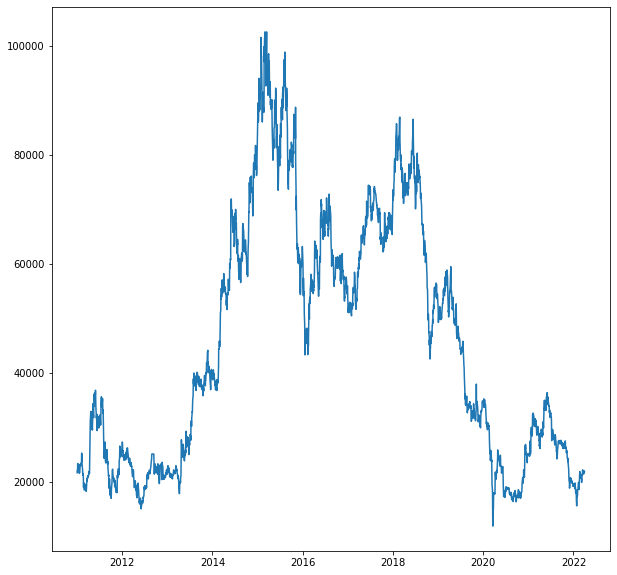

In [11]:
plt.figure(figsize=(10, 10))

dt = fdr.DataReader('006840', '2011') #2011년~현재
plt.plot(dt['Close'])

In [12]:
# KS11	KOSPI 지수
# KQ11	KOSDAQ 지수
# KS50	KOSPI 50 지수
# KS100	KOSPI 100
# KRX100	KRX 100
# KS200	코스피 200

# DJI	다우존스 지수
# IXIC	나스닥 지수
# US500	S&P 500 지수
# VIX	S&P 500 VIX

# JP225	닛케이 225 선물
# STOXX50E	Euro Stoxx 50
# CSI300	CSI 300 (중국)
# HSI	항셍 (홍콩)
# FTSE	영국 FTSE
# DAX	독일 DAX 30
# CAC	프랑스 CAC 40

# 환율 데이터: USD/KRX (원달러 환율), USD/EUR(달러당 유로화 환율), CNY/KRW: 위엔화 원화 환율


# 암호 화폐
# 암호화폐 가격: BTC/USD (비트코인 달러 가격, Bitfinex), BTC/KRW (비트코인 원화 가격, 빗썸)

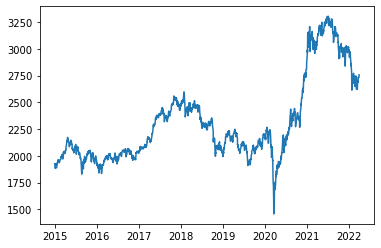

In [13]:
# KS11 (KOSPI 지수), 2015년~현재
df = fdr.DataReader('KS11', '2015')
plt.plot(df['Close'])
plt.show()

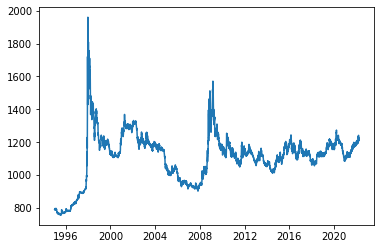

In [14]:
# 원달러 환율, 1995년~현재
df = fdr.DataReader('USD/KRW', '1995')
plt.plot(df['Close'])
plt.show()

### To-do

Q. 삼성전자의 2019년 ~ 현재까지의 종가를 도식화하시오.

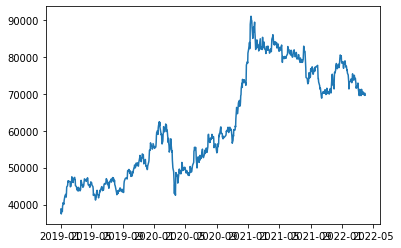

In [16]:
samsung = kospi_listing.loc[kospi_listing.Name=='삼성전자'].Symbol.values[0]
sa = fdr.DataReader(samsung, '2019')
plt.plot(sa.Close)
plt.show()

Q. 삼성전자의 등락폭이 가장 컸던 날의 날짜와 해당 날짜의 등락폭을 구하시오.

In [17]:
best = sa.sort_values('Change').iloc[-1]
print(best.name)
print(best.Change)

2020-03-24 00:00:00
0.1047058823529412


# 데이터 전처리 하기

In [18]:
dt = fdr.StockListing('SP500')

/Users/seungjulee/opt/anaconda3/envs/finance_env/lib/python3.7/site-packages/FinanceDataReader/wikipedia/listing.py:13: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Symbol'] = df['Symbol'].str.replace('\.', '')


In [19]:
a = {}

for name in dt['Symbol'][:20]:
    print(name)
    try:
        a[name] = fdr.DataReader(name, '2018-12-31', '2019-12-31')['Close']
    except:
        print('except')
        pass

MMM
AOS
ABT
ABBV
ABMD
ACN
ATVI
ADM
ADBE
ADP
AAP
AES
AFL
A
AIG
APD
AKAM
ALK
ALB
ARE


In [20]:
a['MMM']

Date
2018-12-31    190.54
2019-01-02    190.95
2019-01-03    183.76
2019-01-04    191.32
2019-01-07    190.88
               ...  
2019-12-24    176.68
2019-12-26    176.59
2019-12-27    177.26
2019-12-30    175.83
2019-12-31    176.42
Name: Close, Length: 253, dtype: float64

In [21]:
k = pd.DataFrame(a)

In [22]:
k.shape

(253, 20)

In [23]:
k

,MMM,AOS,ABT,ABBV,ABMD,ACN,ATVI,ADM,ADBE,ADP,AAP,AES,AFL,A,AIG,APD,AKAM,ALK,ALB,ARE
Date,,,,,,,,,,,,,,,,,,,,
2018-12-31,190.54,42.70,72.33,92.19,325.04,141.01,46.57,40.97,226.24,131.12,157.46,14.46,45.56,67.46,39.41,160.05,61.08,60.85,77.07,115.24
2019-01-02,190.95,43.47,69.50,89.23,309.96,140.59,47.03,40.95,224.57,130.14,157.92,14.18,45.52,65.69,39.62,159.59,59.01,61.52,78.11,111.37
2019-01-03,183.76,42.42,66.22,86.29,302.29,135.79,45.36,40.77,215.70,126.21,162.85,14.17,44.37,63.27,38.75,155.31,57.70,58.12,72.69,112.29
2019-01-04,191.32,44.12,68.11,89.07,313.44,141.07,47.17,41.71,226.19,131.24,158.81,14.64,44.92,65.46,40.18,161.61,59.38,60.00,76.24,113.44
2019-01-07,190.88,44.91,69.13,90.37,314.80,141.56,48.50,41.92,229.26,130.53,161.14,14.71,45.16,66.85,40.41,159.93,61.24,60.12,76.58,114.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-24,176.68,47.50,87.28,89.85,172.30,211.61,58.81,46.08,329.64,169.91,160.57,19.76,52.76,85.30,50.94,235.05,85.73,69.09,72.32,160.10
2019-12-26,176.59,47.74,87.28,89.83,171.01,212.05,58.89,46.20,331.20,170.35,159.27,19.93,52.62,85.45,50.62,236.08,86.34,69.07,72.49,160.03
2019-12-27,177.26,47.81,87.40,89.20,169.27,212.22,59.19,46.30,330.79,170.77,158.35,19.98,52.62,85.42,51.07,235.49,86.50,68.29,72.01,160.40


<AxesSubplot:xlabel='Date'>

<Figure size 3600x3600 with 0 Axes>

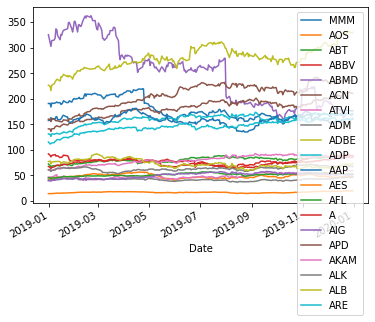

In [24]:
plt.figure(figsize=(50, 50))
k.plot()

In [25]:
kk = k / k.iloc[0]

In [26]:
kk

,MMM,AOS,ABT,ABBV,ABMD,ACN,ATVI,ADM,ADBE,ADP,AAP,AES,AFL,A,AIG,APD,AKAM,ALK,ALB,ARE
Date,,,,,,,,,,,,,,,,,,,,
2018-12-31,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2019-01-02,1.002152,1.018033,0.960874,0.967892,0.953606,0.997021,1.009878,0.999512,0.992618,0.992526,1.002921,0.980636,0.999122,0.973762,1.005329,0.997126,0.966110,1.011011,1.013494,0.966418
2019-01-03,0.964417,0.993443,0.915526,0.936002,0.930009,0.962981,0.974018,0.995118,0.953412,0.962553,1.034231,0.979945,0.973881,0.937889,0.983253,0.970384,0.944663,0.955136,0.943169,0.974401
2019-01-04,1.004094,1.033255,0.941656,0.966157,0.964312,1.000426,1.012884,1.018062,0.999779,1.000915,1.008574,1.012448,0.985953,0.970353,1.019538,1.009747,0.972168,0.986031,0.989231,0.984380
2019-01-07,1.001784,1.051756,0.955758,0.980258,0.968496,1.003900,1.041443,1.023188,1.013349,0.995500,1.023371,1.017289,0.991220,0.990958,1.025374,0.999250,1.002620,0.988003,0.993642,0.990455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-24,0.927259,1.112412,1.206692,0.974618,0.530089,1.500674,1.262830,1.124725,1.457037,1.295836,1.019751,1.366528,1.158033,1.264453,1.292565,1.468604,1.403569,1.135415,0.938368,1.389275
2019-12-26,0.926787,1.118033,1.206692,0.974401,0.526120,1.503794,1.264548,1.127654,1.463932,1.299192,1.011495,1.378285,1.154960,1.266677,1.284446,1.475039,1.413556,1.135086,0.940574,1.388667
2019-12-27,0.930303,1.119672,1.208351,0.967567,0.520767,1.505000,1.270990,1.130095,1.462120,1.302395,1.005652,1.381743,1.154960,1.266232,1.295864,1.471353,1.416176,1.122268,0.934345,1.391878


<AxesSubplot:xlabel='Date'>

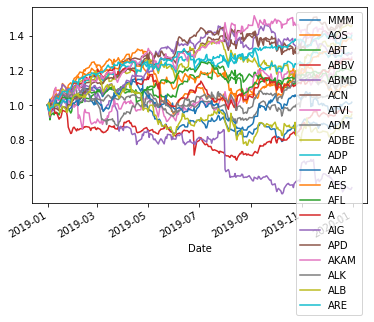

In [27]:
kk.plot()

# Expected Return and Covariance 구하기

In [28]:
data = k
holding_periods=1

In [29]:
returns = data.pct_change(holding_periods).iloc[holding_periods:] # holding period return vector

In [30]:
returns

,MMM,AOS,ABT,ABBV,ABMD,ACN,ATVI,ADM,ADBE,ADP,AAP,AES,AFL,A,AIG,APD,AKAM,ALK,ALB,ARE
Date,,,,,,,,,,,,,,,,,,,,
2019-01-02,0.002152,0.018033,-0.039126,-0.032108,-0.046394,-0.002979,0.009878,-0.000488,-0.007382,-0.007474,0.002921,-0.019364,-0.000878,-0.026238,0.005329,-0.002874,-0.033890,0.011011,0.013494,-0.033582
2019-01-03,-0.037654,-0.024155,-0.047194,-0.032949,-0.024745,-0.034142,-0.035509,-0.004396,-0.039498,-0.030198,0.031218,-0.000705,-0.025264,-0.036840,-0.021959,-0.026819,-0.022200,-0.055267,-0.069389,0.008261
2019-01-04,0.041141,0.040075,0.028541,0.032217,0.036885,0.038884,0.039903,0.023056,0.048632,0.039854,-0.024808,0.033169,0.012396,0.034614,0.036903,0.040564,0.029116,0.032347,0.048838,0.010241
2019-01-07,-0.002300,0.017906,0.014976,0.014595,0.004339,0.003473,0.028196,0.005035,0.013573,-0.005410,0.014672,0.004781,0.005343,0.021234,0.005724,-0.010395,0.031324,0.002000,0.004460,0.006171
2019-01-08,0.004191,0.024493,-0.012006,0.004648,0.011499,0.025290,0.030309,0.018607,0.014918,0.005899,-0.006950,0.023114,0.003100,0.014660,0.003959,-0.011505,0.019758,0.008816,0.009794,0.023217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-24,-0.010030,0.007637,-0.000801,-0.004432,0.010913,0.003700,-0.001358,0.001304,0.002098,-0.000647,0.003751,-0.003027,0.004187,0.000469,-0.000589,-0.000383,-0.002095,-0.002886,-0.001519,0.005590
2019-12-26,-0.000509,0.005053,0.000000,-0.000223,-0.007487,0.002079,0.001360,0.002604,0.004732,0.002590,-0.008096,0.008603,-0.002654,0.001758,-0.006282,0.004382,0.007115,-0.000289,0.002351,-0.000437
2019-12-27,0.003794,0.001466,0.001375,-0.007013,-0.010175,0.000802,0.005094,0.002165,-0.001238,0.002466,-0.005776,0.002509,0.000000,-0.000351,0.008890,-0.002499,0.001853,-0.011293,-0.006622,0.002312


In [31]:
data

,MMM,AOS,ABT,ABBV,ABMD,ACN,ATVI,ADM,ADBE,ADP,AAP,AES,AFL,A,AIG,APD,AKAM,ALK,ALB,ARE
Date,,,,,,,,,,,,,,,,,,,,
2018-12-31,190.54,42.70,72.33,92.19,325.04,141.01,46.57,40.97,226.24,131.12,157.46,14.46,45.56,67.46,39.41,160.05,61.08,60.85,77.07,115.24
2019-01-02,190.95,43.47,69.50,89.23,309.96,140.59,47.03,40.95,224.57,130.14,157.92,14.18,45.52,65.69,39.62,159.59,59.01,61.52,78.11,111.37
2019-01-03,183.76,42.42,66.22,86.29,302.29,135.79,45.36,40.77,215.70,126.21,162.85,14.17,44.37,63.27,38.75,155.31,57.70,58.12,72.69,112.29
2019-01-04,191.32,44.12,68.11,89.07,313.44,141.07,47.17,41.71,226.19,131.24,158.81,14.64,44.92,65.46,40.18,161.61,59.38,60.00,76.24,113.44
2019-01-07,190.88,44.91,69.13,90.37,314.80,141.56,48.50,41.92,229.26,130.53,161.14,14.71,45.16,66.85,40.41,159.93,61.24,60.12,76.58,114.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-24,176.68,47.50,87.28,89.85,172.30,211.61,58.81,46.08,329.64,169.91,160.57,19.76,52.76,85.30,50.94,235.05,85.73,69.09,72.32,160.10
2019-12-26,176.59,47.74,87.28,89.83,171.01,212.05,58.89,46.20,331.20,170.35,159.27,19.93,52.62,85.45,50.62,236.08,86.34,69.07,72.49,160.03
2019-12-27,177.26,47.81,87.40,89.20,169.27,212.22,59.19,46.30,330.79,170.77,158.35,19.98,52.62,85.42,51.07,235.49,86.50,68.29,72.01,160.40


In [32]:
data.shift(holding_periods)

,MMM,AOS,ABT,ABBV,ABMD,ACN,ATVI,ADM,ADBE,ADP,AAP,AES,AFL,A,AIG,APD,AKAM,ALK,ALB,ARE
Date,,,,,,,,,,,,,,,,,,,,
2018-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-02,190.54,42.70,72.33,92.19,325.04,141.01,46.57,40.97,226.24,131.12,157.46,14.46,45.56,67.46,39.41,160.05,61.08,60.85,77.07,115.24
2019-01-03,190.95,43.47,69.50,89.23,309.96,140.59,47.03,40.95,224.57,130.14,157.92,14.18,45.52,65.69,39.62,159.59,59.01,61.52,78.11,111.37
2019-01-04,183.76,42.42,66.22,86.29,302.29,135.79,45.36,40.77,215.70,126.21,162.85,14.17,44.37,63.27,38.75,155.31,57.70,58.12,72.69,112.29
2019-01-07,191.32,44.12,68.11,89.07,313.44,141.07,47.17,41.71,226.19,131.24,158.81,14.64,44.92,65.46,40.18,161.61,59.38,60.00,76.24,113.44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-24,178.47,47.14,87.35,90.25,170.44,210.83,58.89,46.02,328.95,170.02,159.97,19.82,52.54,85.26,50.97,235.14,85.91,69.29,72.43,159.21
2019-12-26,176.68,47.50,87.28,89.85,172.30,211.61,58.81,46.08,329.64,169.91,160.57,19.76,52.76,85.30,50.94,235.05,85.73,69.09,72.32,160.10
2019-12-27,176.59,47.74,87.28,89.83,171.01,212.05,58.89,46.20,331.20,170.35,159.27,19.93,52.62,85.45,50.62,236.08,86.34,69.07,72.49,160.03


In [33]:
returns2 = (data - data.shift(holding_periods)) / data.shift(holding_periods)

In [34]:
log_returns = np.log(data) - np.log(data.shift(holding_periods))

In [35]:
log_returns

,MMM,AOS,ABT,ABBV,ABMD,ACN,ATVI,ADM,ADBE,ADP,AAP,AES,AFL,A,AIG,APD,AKAM,ALK,ALB,ARE
Date,,,,,,,,,,,,,,,,,,,,
2018-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-02,0.002149,0.017872,-0.039912,-0.032634,-0.047505,-0.002983,0.009829,-0.000488,-0.007409,-0.007502,0.002917,-0.019554,-0.000878,-0.026588,0.005314,-0.002878,-0.034478,0.010951,0.013404,-0.034159
2019-01-03,-0.038381,-0.024451,-0.048344,-0.033504,-0.025056,-0.034738,-0.036155,-0.004405,-0.040299,-0.030664,0.030741,-0.000705,-0.025588,-0.037535,-0.022203,-0.027185,-0.022450,-0.056852,-0.071914,0.008227
2019-01-04,0.040317,0.039293,0.028142,0.031709,0.036221,0.038147,0.039127,0.022794,0.047487,0.039081,-0.025121,0.032630,0.012320,0.034028,0.036239,0.039763,0.028700,0.031835,0.047682,0.010189
2019-01-07,-0.002302,0.017747,0.014865,0.014490,0.004330,0.003467,0.027806,0.005022,0.013481,-0.005425,0.014565,0.004770,0.005329,0.021012,0.005708,-0.010450,0.030843,0.001998,0.004450,0.006152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-24,-0.010080,0.007608,-0.000802,-0.004442,0.010854,0.003693,-0.001359,0.001303,0.002095,-0.000647,0.003744,-0.003032,0.004179,0.000469,-0.000589,-0.000383,-0.002097,-0.002891,-0.001520,0.005575
2019-12-26,-0.000510,0.005040,0.000000,-0.000223,-0.007515,0.002077,0.001359,0.002601,0.004721,0.002586,-0.008129,0.008566,-0.002657,0.001757,-0.006302,0.004372,0.007090,-0.000290,0.002348,-0.000437
2019-12-27,0.003787,0.001465,0.001374,-0.007038,-0.010227,0.000801,0.005081,0.002162,-0.001239,0.002462,-0.005793,0.002506,0.000000,-0.000351,0.008850,-0.002502,0.001851,-0.011357,-0.006644,0.002309


In [36]:
holding_periods=1
n_term=252 # dailiy return을 annualize
data = k

returns = data.pct_change(holding_periods).iloc[holding_periods:] # holding period return vector

exp_rets = returns.mean() * n_term # average return -- > APR(annual percentage rate)
cov_mat = returns.cov() * n_term # covariance
corr_mat = returns.corr() # corr

In [37]:
corr_mat

,MMM,AOS,ABT,ABBV,ABMD,ACN,ATVI,ADM,ADBE,ADP,AAP,AES,AFL,A,AIG,APD,AKAM,ALK,ALB,ARE
MMM,1.000000,0.433821,0.291815,0.235660,0.191765,0.397799,0.232976,0.426112,0.287453,0.340950,0.207645,0.282074,0.288850,0.360360,0.388418,0.338800,0.322732,0.403123,0.439768,0.121983
AOS,0.433821,1.000000,0.237100,0.148616,0.242008,0.281791,0.224013,0.222165,0.231205,0.277202,0.194995,0.123695,0.262954,0.319420,0.363186,0.262163,0.276001,0.358854,0.447700,0.157172
ABT,0.291815,0.237100,1.000000,0.368518,0.391428,0.566269,0.293003,0.279873,0.521462,0.566932,0.155020,0.307210,0.460534,0.571211,0.323517,0.480947,0.486013,0.229046,0.244832,0.360960
ABBV,0.235660,0.148616,0.368518,1.000000,0.165973,0.290872,0.206074,0.212389,0.333090,0.288840,0.129316,0.277472,0.220186,0.321858,0.205837,0.198545,0.275872,0.199681,0.206293,0.266193
ABMD,0.191765,0.242008,0.391428,0.165973,1.000000,0.179323,0.107772,0.195761,0.198830,0.220275,0.073226,0.012535,0.141986,0.240540,0.181193,0.123305,0.098355,0.089244,0.177768,0.133291
ACN,0.397799,0.281791,0.566269,0.290872,0.179323,1.000000,0.425764,0.361190,0.605730,0.693785,0.157662,0.384057,0.476308,0.510825,0.404909,0.519182,0.593287,0.292241,0.341877,0.356910
ATVI,0.232976,0.224013,0.293003,0.206074,0.107772,0.425764,1.000000,0.218097,0.399546,0.338417,0.246275,0.131779,0.255808,0.291625,0.177602,0.170420,0.438253,0.257181,0.266565,0.226073
ADM,0.426112,0.222165,0.279873,0.212389,0.195761,0.361190,0.218097,1.000000,0.369496,0.256055,0.170810,0.297870,0.321526,0.396804,0.377867,0.303710,0.316626,0.320298,0.405512,0.174042
ADBE,0.287453,0.231205,0.521462,0.333090,0.198830,0.605730,0.399546,0.369496,1.000000,0.607626,0.149398,0.241819,0.350705,0.425677,0.332152,0.403058,0.556657,0.258301,0.294114,0.357298
ADP,0.340950,0.277202,0.566932,0.288840,0.220275,0.693785,0.338417,0.256055,0.607626,1.000000,0.168794,0.312212,0.481605,0.482085,0.411218,0.502432,0.529397,0.299528,0.356879,0.346784


In [38]:
cov_mat = returns.cov()

In [39]:
var = np.diag(cov_mat)

In [40]:
annulized_var = var * n_term

In [41]:
daily_std = returns.std()

In [42]:
annulized_std = daily_std * np.sqrt(252)

In [43]:
returns.cov()

,MMM,AOS,ABT,ABBV,ABMD,ACN,ATVI,ADM,ADBE,ADP,AAP,AES,AFL,A,AIG,APD,AKAM,ALK,ALB,ARE
MMM,0.000252,0.000110,0.000058,0.000065,0.000097,0.000067,0.000083,0.000086,0.000068,0.000062,0.000055,0.000056,0.000043,0.000088,0.000090,0.000065,0.000071,0.000094,0.000159,0.000019
AOS,0.000110,0.000253,0.000047,0.000041,0.000122,0.000048,0.000080,0.000045,0.000055,0.000051,0.000052,0.000025,0.000040,0.000078,0.000085,0.000050,0.000061,0.000084,0.000162,0.000025
ABT,0.000058,0.000047,0.000158,0.000080,0.000156,0.000076,0.000082,0.000045,0.000098,0.000082,0.000033,0.000049,0.000055,0.000111,0.000060,0.000073,0.000084,0.000042,0.000070,0.000045
ABBV,0.000065,0.000041,0.000080,0.000299,0.000091,0.000053,0.000080,0.000047,0.000086,0.000057,0.000037,0.000060,0.000036,0.000086,0.000052,0.000041,0.000066,0.000051,0.000081,0.000046
ABMD,0.000097,0.000122,0.000156,0.000091,0.001010,0.000061,0.000076,0.000079,0.000095,0.000080,0.000039,0.000005,0.000043,0.000118,0.000084,0.000047,0.000043,0.000042,0.000129,0.000042
ACN,0.000067,0.000048,0.000076,0.000053,0.000061,0.000113,0.000101,0.000049,0.000097,0.000085,0.000028,0.000051,0.000048,0.000084,0.000063,0.000066,0.000087,0.000046,0.000083,0.000038
ATVI,0.000083,0.000080,0.000082,0.000080,0.000076,0.000101,0.000499,0.000062,0.000134,0.000087,0.000092,0.000037,0.000054,0.000100,0.000058,0.000046,0.000135,0.000085,0.000136,0.000050
ADM,0.000086,0.000045,0.000045,0.000047,0.000079,0.000049,0.000062,0.000161,0.000070,0.000037,0.000036,0.000048,0.000039,0.000077,0.000070,0.000046,0.000055,0.000060,0.000117,0.000022
ADBE,0.000068,0.000055,0.000098,0.000086,0.000095,0.000097,0.000134,0.000070,0.000225,0.000105,0.000037,0.000046,0.000050,0.000098,0.000073,0.000073,0.000116,0.000057,0.000101,0.000054
ADP,0.000062,0.000051,0.000082,0.000057,0.000080,0.000085,0.000087,0.000037,0.000105,0.000131,0.000032,0.000045,0.000052,0.000085,0.000069,0.000069,0.000084,0.000051,0.000093,0.000040


# To-do

다음의 조건에 해당하는 각 지수별 price data를 pandas의 DataFrame 형태로 생성하시오.      
https://financedata.github.io/posts/finance-data-reader-users-guide.html
* 조건 1: 각 row의 인덱스는 날짜, 각 컬럼은 KOSPI200 지수, S&P500 지수, 나스닥 지수, 닛케이225 선물, USD/KRW로 구성.
* 조건 2: 종가 기준, 기간은 2010년 이후 현재까지.



 KS200:	코스피 200, US500:	S&P 500 지수, JP225:	닛케이 225 선물



In [44]:
symbols = ['KS200', 'US500', 'IXIC', 'JP225', 'USD/KRW']

a = {}
for symbol in symbols:
    a[symbol] = fdr.DataReader(symbol, '2009-12-31')['Close']

In [45]:
a = pd.DataFrame(a)

In [46]:
a

,KS200,US500,IXIC,JP225,USD/KRW
Date,,,,,
2009-12-31,NaN,1115.10,2269.15,NaN,1166.08
2010-01-01,NaN,NaN,NaN,NaN,1166.08
2010-01-04,223.49,1132.99,2308.42,NaN,1150.00
2010-01-05,222.84,1136.52,2308.71,NaN,1140.20
2010-01-06,224.67,1137.14,2301.09,NaN,1129.20
...,...,...,...,...,...
2022-03-25,362.06,4543.04,14169.30,28149.84,1225.08
2022-03-28,362.06,4575.52,14354.90,27943.89,1223.65
2022-03-29,363.77,4631.60,14619.64,28252.42,1207.35


위에서 생성된 DataFrame을 활용하여 다음의 데이터를 만드시오.    
a) daily return vector.    
b) (annulaize된) expected return    
c) covariance matrix    
d) correlation matrix

In [47]:
holding_periods=1
n_term=252 # dailiy return을 annualize
data = a

In [48]:
returns = data.pct_change(holding_periods).iloc[holding_periods:]

In [49]:
exp_rets = returns.mean() * n_term # average return -- > APR(annual percentage rate)

In [50]:
cov_mat = returns.cov() * n_term # covariance

In [51]:
corr_mat = returns.corr() # corr

# Efficient Frontier 구하기

Reference: 
https://cvxopt.org/userguide/coneprog.html?highlight=qp#cvxoptsolvers.qp

In [52]:
def mean_var_portfolio(cov_mat, exp_rets, target_ret):
    
    n = len(cov_mat)

    # Objective function
    # min (1/2)*w.T*P*w
    P = opt.matrix(cov_mat.values) 
    q = opt.matrix(0.0, (n, 1))

    # Constraints Gw <= h
    # exp_rets*w >= target_ret and w >= 0
    G = opt.matrix(np.vstack((-exp_rets.values, -np.identity(n))))
    h = opt.matrix(np.vstack((-target_ret, np.zeros((n, 1)))))

    # Constraints Aw = b
    # sum(w) = 1
    A = opt.matrix(1.0, (1, n))
    b = opt.matrix(1.0)

    # Solve
    solvers.options['show_progress'] = False
    sol = solvers.qp(P, q, G, h, A, b)

    # Put weights into a labeled series
    w = pd.Series(sol['x'], index=cov_mat.index)

    return w

In [53]:
np.array(exp_rets)

array([0.05309082, 0.12627816, 0.16473407, 0.11357321, 0.00669556])

In [54]:
np.sqrt(np.diag(cov_mat))

array([0.16873623, 0.16957901, 0.19308142, 0.20192489, 0.08412283])

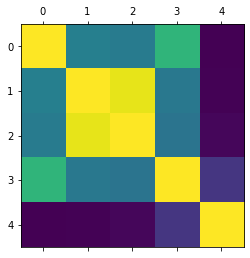

In [55]:
plt.matshow(corr_mat)
plt.show()

In [56]:
corr_mat.style.background_gradient(cmap='coolwarm')

,KS200,US500,IXIC,JP225,USD/KRW
KS200,1.000000,0.225851,0.203342,0.529055,-0.360615
US500,0.225851,1.000000,0.948516,0.182767,-0.350645
IXIC,0.203342,0.948516,1.000000,0.162793,-0.337831
JP225,0.529055,0.182767,0.162793,1.000000,-0.144162
USD/KRW,-0.360615,-0.350645,-0.337831,-0.144162,1.000000


<AxesSubplot:>

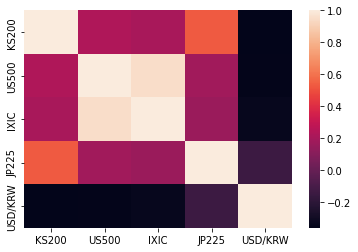

In [57]:
import seaborn as sns
sns.heatmap(corr_mat)

In [58]:
exp_rets

KS200      0.053091
US500      0.126278
IXIC       0.164734
JP225      0.113573
USD/KRW    0.006696
dtype: float64

In [59]:
np.sqrt(np.diag(cov_mat)).max()

0.20192488946219214

In [60]:
exp_rets.max()

0.16473407215635713

In [61]:
exp_rets[exp_rets > 0].min()

0.0066955594056760555

In [62]:
max_risk = 0.5
max_ret = exp_rets.max()
min_ret = exp_rets[exp_rets > 0].min()

n_step = 100
step_diff = (max_ret - min_ret)/n_step

risks = []
rets = []

for step in range(n_step):
    target_ret = min_ret + (step * step_diff) # y축을 아래부터 시작해서 위로 조금씩 올려가면서
    _w = mean_var_portfolio(cov_mat, exp_rets, target_ret) # 최적화를 돌려서 나온 _w임.
    risk = np.sqrt(np.dot(np.dot(_w, cov_mat), _w))
    
    if risk > max_risk:
        break
    
    risks.append(risk)
    ret = np.dot(exp_rets, _w)
    rets.append(ret)

In [63]:
risks

[0.053257329086349524,
 0.05325732862503114,
 0.053257328112922435,
 0.05325732754406089,
 0.05325732691164624,
 0.05325732621198099,
 0.05325732564820202,
 0.053257325020965744,
 0.05325732432260639,
 0.05325732354334737,
 0.05325732266965615,
 0.05325732168088987,
 0.0532573205424042,
 0.05325731919145951,
 0.05325731750957981,
 0.05325731527937567,
 0.05325731223127737,
 0.05325731346339931,
 0.053257015227343954,
 0.05328508730127353,
 0.0534004695630992,
 0.053582965822757685,
 0.0538296863294016,
 0.05413966436032051,
 0.05451187712199024,
 0.05494505387426015,
 0.055437770219723216,
 0.055988451072918784,
 0.05659540119507847,
 0.057256846988952455,
 0.057970860458900604,
 0.05873560631278103,
 0.059549454459104936,
 0.06041405185637797,
 0.0613335868059651,
 0.062308618991493966,
 0.06333280749932403,
 0.06440605422609676,
 0.06552566268410039,
 0.06668925004542452,
 0.06789453529895463,
 0.06913935214388867,
 0.07042163813081102,
 0.0717393222247326,
 0.07309048629444768,
 0.0

In [64]:
rets

[0.035637792305807735,
 0.03563774741601656,
 0.035637698006841,
 0.03563764360938376,
 0.03563758370945277,
 0.035637518144696345,
 0.035637466934538516,
 0.035637411121746024,
 0.03563735050902809,
 0.035637284935511104,
 0.03563721425221403,
 0.03563713823136689,
 0.03563705633606108,
 0.03563696726237562,
 0.035636868480220546,
 0.03563675906522017,
 0.03563667764369397,
 0.035637571404005156,
 0.03558427271472879,
 0.036725189801043376,
 0.03830336417895837,
 0.039883669146701384,
 0.041464224396067936,
 0.043044507364762896,
 0.04462484625897214,
 0.046205203766996876,
 0.0477855873800477,
 0.04936597979447656,
 0.05094637011920378,
 0.05252678434050854,
 0.05410711455077774,
 0.05568750683644193,
 0.05726792323686766,
 0.05884828835790178,
 0.06042865533430617,
 0.06200906977517601,
 0.06358944704876339,
 0.06516983217904809,
 0.06675021787098515,
 0.06833060112056419,
 0.06991098082104005,
 0.07149136092441233,
 0.07307174671805469,
 0.07465213278003806,
 0.07623251842610254,
 

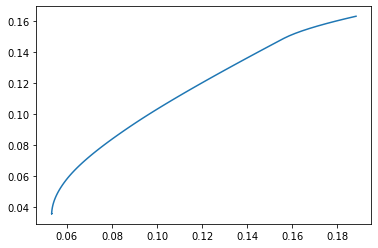

In [65]:
plt.plot(risks, rets)
plt.show()

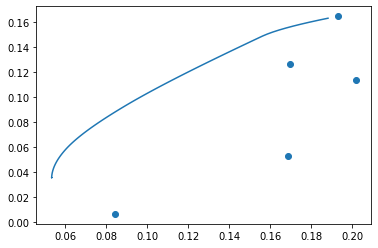

In [66]:
plt.plot(risks, rets)
var = np.diag(cov_mat)
plt.scatter(np.sqrt(var), exp_rets)
plt.show()

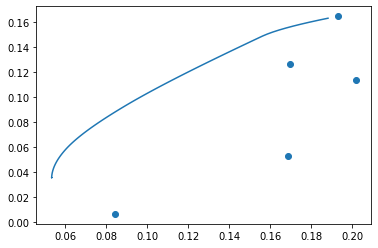

In [67]:
plt.plot(risks, rets)
var = np.diag(cov_mat)
plt.scatter(np.sqrt(var), exp_rets)
plt.show()

## To-Do

위 실습 1,2에서 구한 expected return과 covriance를 바탕으로 아래의 코드의 빈칸을 채워 Efficient frontier를 그려보시오

In [68]:
max_risk=0.5
max_ret = ??
min_ret = ??

n_step = 1000
step_diff = (max_ret - min_ret)/n_step

risks = []
rets = []

for step in range(n_step):
    target_ret = min_ret + (step * step_diff) # y축을 아래부터 시작해서 위로 조금씩 올려가면서
    _w = ?? # 최적화를 돌려서 나온 _w임.
    risk = ??

    if risk > max_risk:
        break
    
    risks.append(risk)
    ret = ??
    rets.append(ret)

SyntaxError: invalid syntax (1451318246.py, line 2)

Answer

In [69]:
max_risk=0.5
max_ret = exp_rets.max()
min_ret = exp_rets[exp_rets > 0].min()

n_step = 1000
step_diff = (max_ret - min_ret)/n_step

risks = []
rets = []

for step in range(n_step):
    target_ret = min_ret + (step * step_diff) # y축을 아래부터 시작해서 위로 조금씩 올려가면서
    _w = mean_var_portfolio(cov_mat, exp_rets, target_ret) # 최적화를 돌려서 나온 _w임.
    risk = np.sqrt(np.dot(np.dot(_w, cov_mat), _w))

    if risk > max_risk:
        break
    
    risks.append(risk)
    ret = np.dot(exp_rets, _w)
    rets.append(ret)

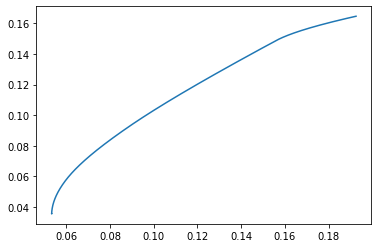

In [71]:
plt.plot(risks, rets)
plt.show()